In [2]:
import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
from a_carbon_math import carbon_flux
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os

In [ ]:
#Attempting a plotting function
def mean_trends_82_20(lmean,ltrend82,ltrend20,rmean,rtrend82,rtrend20,titles,ltrendmm=None,rtrendmm=None,ltrendm=None,rtrendm=None,l_conversion=1,r_conversion=1,meancolormap='bwr',figsize=(20,10)):
    '''
    lmean     xrarr
    ltrend82  xrarr
    ltrend82p xarr
    ltrend20  xrarr
    ltrend20p pval xarr
    
    rmean     xrarr
    rtrend82  xrarr
    rtrend82p pval xarr
    rtrend20  xrarr 
    rtrend20p pval xarr
    titles    array[1,2,3,4,5,6]
    l_conversion float
    r_conversion float
    meancolormap     str cmap (ie viridis)
    
    Will dynamically produce a 3 x 2 (6) subplot with mean on top and 82 and 2000 trends below. 
    Can produce for any trend variable (produce mean over time, need a flag for this?)
    
    '''
    
    plt.figure(figsize=figsize)
    plt.subplot(321)
    if type(ltrendm)==type(None):
        (lmean.mean(dim='time')*l_conversion).plot(cmap=meancolormap) 
    else:
        (lmean.mean(dim='time')*l_conversion).plot(vmin=ltrendm[1],vmax=ltrendm[0],cmap=meancolormap)
    plt.title(titles[0])
    #(((cafe_co2_mean.stf10.mean(dim='time')/1000)*86400)*-12)
    #plt.title('CAFE ens mean mean CO2 flux out of ocean (gC m2 day)')

    plt.subplot(322)
    if type(ltrendm)==type(None):
        (rmean.mean(dim='time')*r_conversion).plot(cmap=meancolormap) 
    else:
        (rmean.mean(dim='time')*r_conversion).plot(vmin=rtrendm[1],vmax=rtrendm[0],cmap=meancolormap)
    plt.title(titles[1])
    #(land_obs.fgco2_smoothed/365).mean(dim='time').plot(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Lanschutzer mean CO2 flux out of ocean (gC m2 day)')

    plt.subplot(323)
    if type(ltrendmm)==type(None):
        (ltrend82*l_conversion).plot(cmap='bwr')
    else:
        (ltrend82*l_conversion).plot(vmax=ltrendmm[1],vmin=ltrendmm[0],cmap='bwr')
    plt.title(titles[2])
    #((((cafe_co2_82tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('CAFE CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
    #plt.contourf(cafe_co2_82tr.pval.lon,cafe_co2_82tr.pval.lat,cafe_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
 


    plt.subplot(324)
    if type(rtrendmm)==type(None):
        (rtrend82*r_conversion).plot(cmap='bwr')
    
    else:
        (rtrend82*r_conversion).plot(vmax=rtrendmm[1],vmin=rtrendmm[0],cmap='bwr')
    plt.title(titles[3])
    #((land_obs_tr_1982.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Landshutzer CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
    #plt.contourf(land_obs_tr_1982.pval.lon,land_obs_tr_1982.pval.lat,land_obs_tr_1982.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   


    plt.subplot(325)
    if type(ltrendmm)==type(None):
        (ltrend20*l_conversion).plot(cmap='bwr')
    else:
        (ltrend20*l_conversion).plot(vmax=ltrendmm[1],vmin=ltrendmm[0],cmap='bwr')
    plt.title(titles[4])
    #((((cafe_co2_20tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('CAFE CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
    #plt.contourf(cafe_co2_20tr.pval.lon,cafe_co2_20tr.pval.lat,cafe_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
    #plt.tight_layout()


    plt.subplot(326)
    if type(rtrendmm)==type(None):
        (rtrend20*r_conversion).plot(cmap='bwr')
    else:
        (rtrend20*r_conversion).plot(vmax=rtrendmm[1],vmin=rtrendmm[0],cmap='bwr')
    plt.title(titles[5])
    #((land_obs_tr_2000.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Landshutzer CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
    #plt.contourf(land_obs_tr_2000.pval.lon,land_obs_tr_2000.pval.lat,land_obs_tr_2000.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
    plt.tight_layout()
    plt.show()

### Reminder for units

In [6]:
d=xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr',consolidated=True)
for i in d.variables:
    if len(i)<8:
        t='\t\t'
    else:#if len(i)<13:
        t='\t'
    try:
        print(i+t+d[i].units)
    except:
        print(i+t+'no units')

adic		mmol/m^3
alk		mmol/m^3
caco3		mmol/m^3
caco3_sediment	mmolN/m^2
det		mmol/m^3
det_sediment	mmolN/m^2
dic		mmol/m^3
ensemble	no units
export_inorg	mmolC/m^2/s
export_prod	mmolN/m^2/s
fe		mmol/m^3
no3		mmol/m^3
o2		mmol/m^3
paco2		
pco2		
phy		mmol/m^3
pprod_gross	mmolN/m^3/s
pprod_gross_2d	mmolN/m^2/s
scalar_axis	none
st_ocean	meters
stf03		mmol/m^2/s
stf07		mmol/m^2/s
stf10		mmol/m^2/s
surface_adic	mmol/m^3
surface_alk	mmol/m^3
surface_caco3	mmol/m^3
surface_det	mmol/m^3
surface_dic	mmol/m^3
surface_fe	mmol/m^3
surface_no3	mmol/m^3
surface_o2	mmol/m^3
surface_phy	mmol/m^3
surface_zoo	mmol/m^3
time		no units
total_aco2_flux	Pg/yr
total_co2_flux	Pg/yr
xt_ocean	degrees_E
yt_ocean	degrees_N
zoo		mmol/m^3


## Load our data in

In [2]:
cafe_co2_all=(((xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/stf10_all_1982.nc')/1000)*86400)*-12)#g/m2/day
cafe_sst_all=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/sst_all_1982.nc')

In [3]:
#Bring all the unit conversions here. 

phy_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_ensmean_1982.nc')
#phy_std=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_ensstd_1982.nc')
phy_trend82=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_meantrends_1982.nc')
phy_trend20=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/surface_phy_meantrends_2000.nc')

#pprod_std=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_ensstd_1982.nc')
pprod_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_ensmean_1982.nc')
pprod_trend82=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_meantrends_1982.nc')
pprod_trend20=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_meantrends_2000.nc')


#LOAD CAFE SST AND CO2 FLUX
cafe_sst_std=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_ensstd_1982.nc')
cafe_sst_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_ensmean_1982.nc')
cafe_sst_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_meantrends_1982.nc')
cafe_sst_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/sst_meantrends_2000.nc')


cafe_co2_std=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_ensstd_1982.nc')
cafe_co2_mean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_ensmean_1982.nc')
cafe_co2_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_meantrends_1982.nc')
cafe_co2_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/global/stf10_meantrends_2000.nc')


#Load CO2 and SST OBS PRODUCTS
land_co2=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzer_global_regrid.nc')/365 #g/m2/day
land_co2_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzer_global_regrid_trend_1982.nc')
land_co2_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzer_global_regrid_trend_2000.nc')

rey_sst=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.nc')
rey_sst_82tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.trend.1982.nc')
rey_sst_20tr=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.trend.2000.nc')


## Phytoplankton test in progress

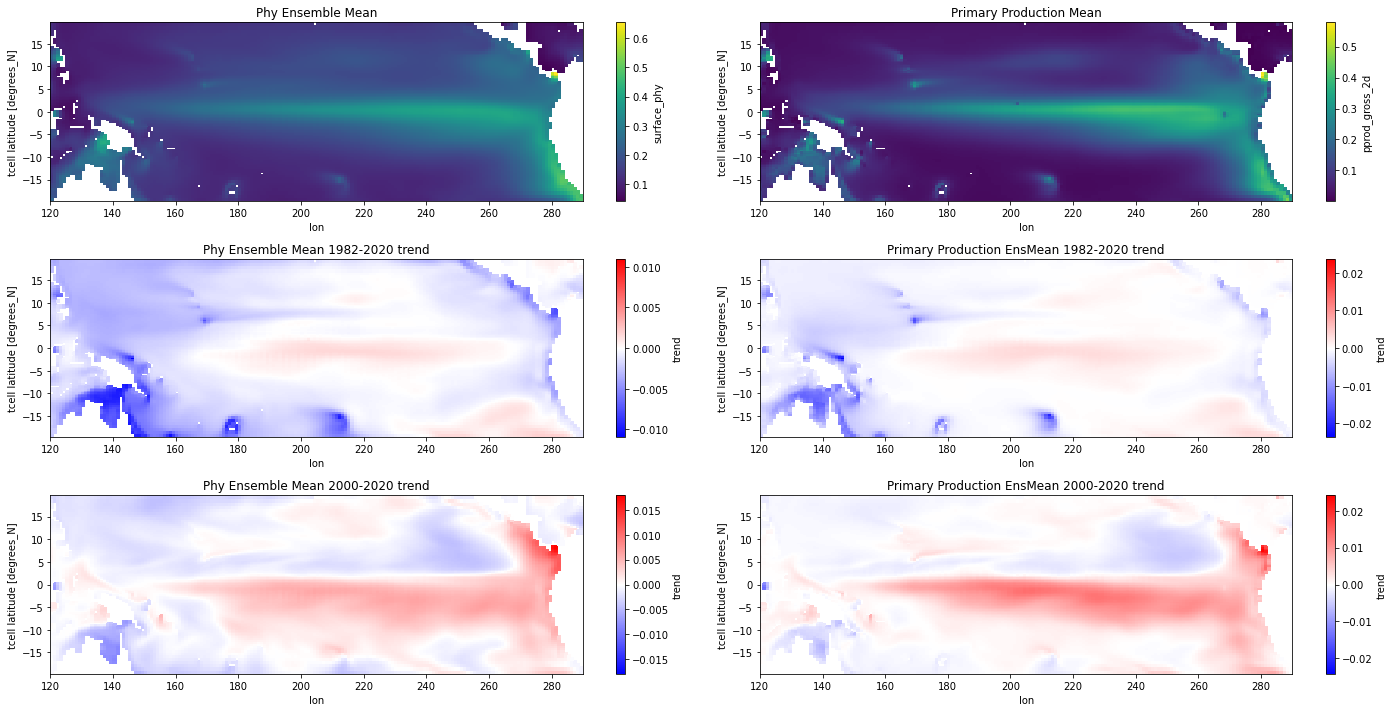

In [4]:
#Test the plotting function. Not super easy to use to be honest. 
titles=[
    'Phy Ensemble Mean',
    'Primary Production Mean',
    'Phy Ensemble Mean 1982-2020 trend',
    'Primary Production EnsMean 1982-2020 trend',
    'Phy Ensemble Mean 2000-2020 trend',
    'Primary Production EnsMean 2000-2020 trend']



mean_trends_82_20(lmean=phy_mean.surface_phy,
                  ltrend82=phy_trend82.trend,
                  ltrend20=phy_trend20.trend,
                  rmean=pprod_mean.pprod_gross_2d,
                  rtrend82=pprod_trend82.trend,
                  rtrend20=pprod_trend20.trend,
                  titles=titles,
                  ltrendmm=None,
                  rtrendmm=None,
                  ltrendm=None,
                  rtrendm=None,
                  l_conversion=1,
                  r_conversion=6.625*12*86400/1000,
                  meancolormap='viridis',
                  figsize=(20,10))

## Lets look at and compare model CO2 flux to Landshutzer (spatial)

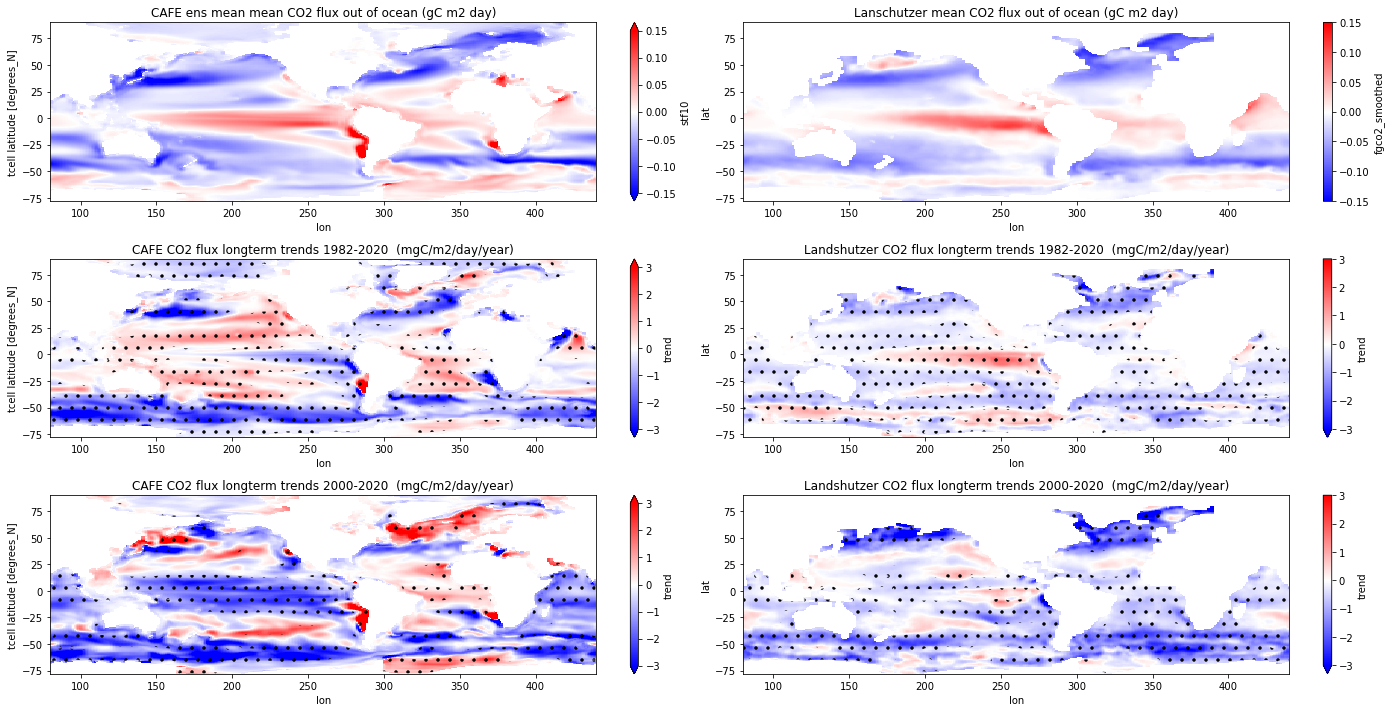

In [149]:
#CO2 FLUX mean and trends
plt.figure(figsize=(20,10))
plt.subplot(321)

(((cafe_co2_mean.stf10.mean(dim='time')/1000)*86400)*-12).plot(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE ens mean mean CO2 flux out of ocean (gC m2 day)')

plt.subplot(322)
(land_co2.fgco2_smoothed).mean(dim='time').plot(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Lanschutzer mean CO2 flux out of ocean (gC m2 day)')

plt.subplot(323)
((((cafe_co2_82tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
plt.contourf(cafe_co2_82tr.pval.lon,cafe_co2_82tr.pval.lat,cafe_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(324)
((land_co2_82tr.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Landshutzer CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
plt.contourf(land_co2_82tr.pval.lon,land_co2_82tr.pval.lat,land_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(325)
((((cafe_co2_20tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
plt.contourf(cafe_co2_20tr.pval.lon,cafe_co2_20tr.pval.lat,cafe_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(326)
((land_co2_20tr.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Landshutzer CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
plt.contourf(land_co2_20tr.pval.lon,land_co2_20tr.pval.lat,land_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   


plt.tight_layout()



Text(0, 0.5, 'lat')

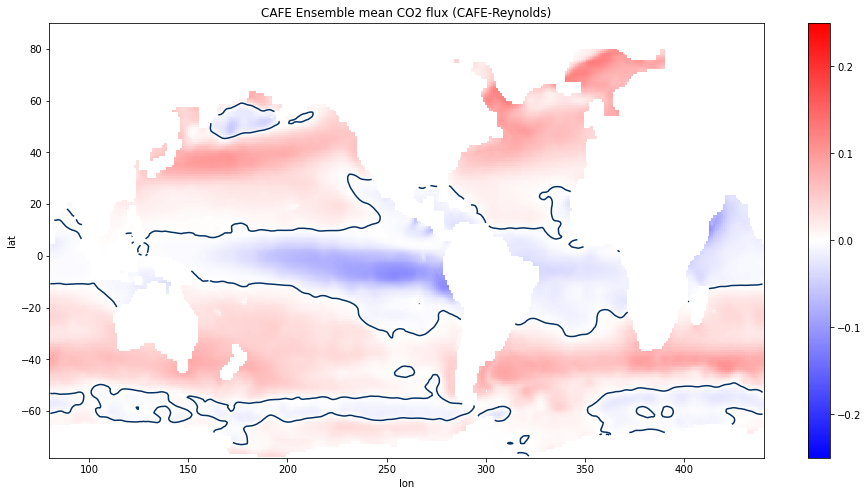

In [157]:
#Look at the difference between ensemble 1 and landschutzer
plt.figure(figsize=(16,8))
((cafe_co2_mean.stf10.mean(dim='time'))-land_co2.fgco2_smoothed.mean(dim='time')).plot(vmin=-0.25,vmax=0.25,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
((cafe_co2_mean.stf10.mean(dim='time'))-land_co2.fgco2_smoothed.mean(dim='time')).plot.contour(levels=[0])
                                                                                                 
plt.title('CAFE Ensemble mean CO2 flux (CAFE-Reynolds)')
plt.ylabel('lat')

#plt.subplot(212)
#(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot(vmin=-1.5,vmax=1.5,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
#(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot.contour(levels=[0])
#plt.title('Mean CAFE SST anomoly (CAFE-Reynolds)')
#plt.ylabel('Lat')
#plt.tight_layout()

## Lets look at and compare model CO2 flux to Landshutzer (temporal)

cafe Co2 flux: 0.022411992866889417
land co2 flux: 0.028903054138014892
Whole EqPac : -17.8286516642985% err
cafe Co2 flux: 0.047760275030057225
land co2 flux: 0.06976458238986694
SouthEast EqPac : -21.37465213848831% err
cafe Co2 flux: 0.014236568198916121
land co2 flux: 0.016801987690276132
NorthEast EqPac : -19.734110382334382% err
cafe Co2 flux: 0.03099842161448667
land co2 flux: 0.043283285040071534
All East EqPac : -17.211551842081576% err
cafe Co2 flux: 0.027685718180518855
land co2 flux: 0.03421978466709998
Central EqPac : -9.861949124898471% err
cafe Co2 flux: 0.020130387883496553
land co2 flux: 0.017361798570402293
Dateline EqPac : -2.8297158845944614% err
cafe Co2 flux: 0.005361506035280114
land co2 flux: 0.003753222843304966
FarWest EqPac : -377.29769808868815% err


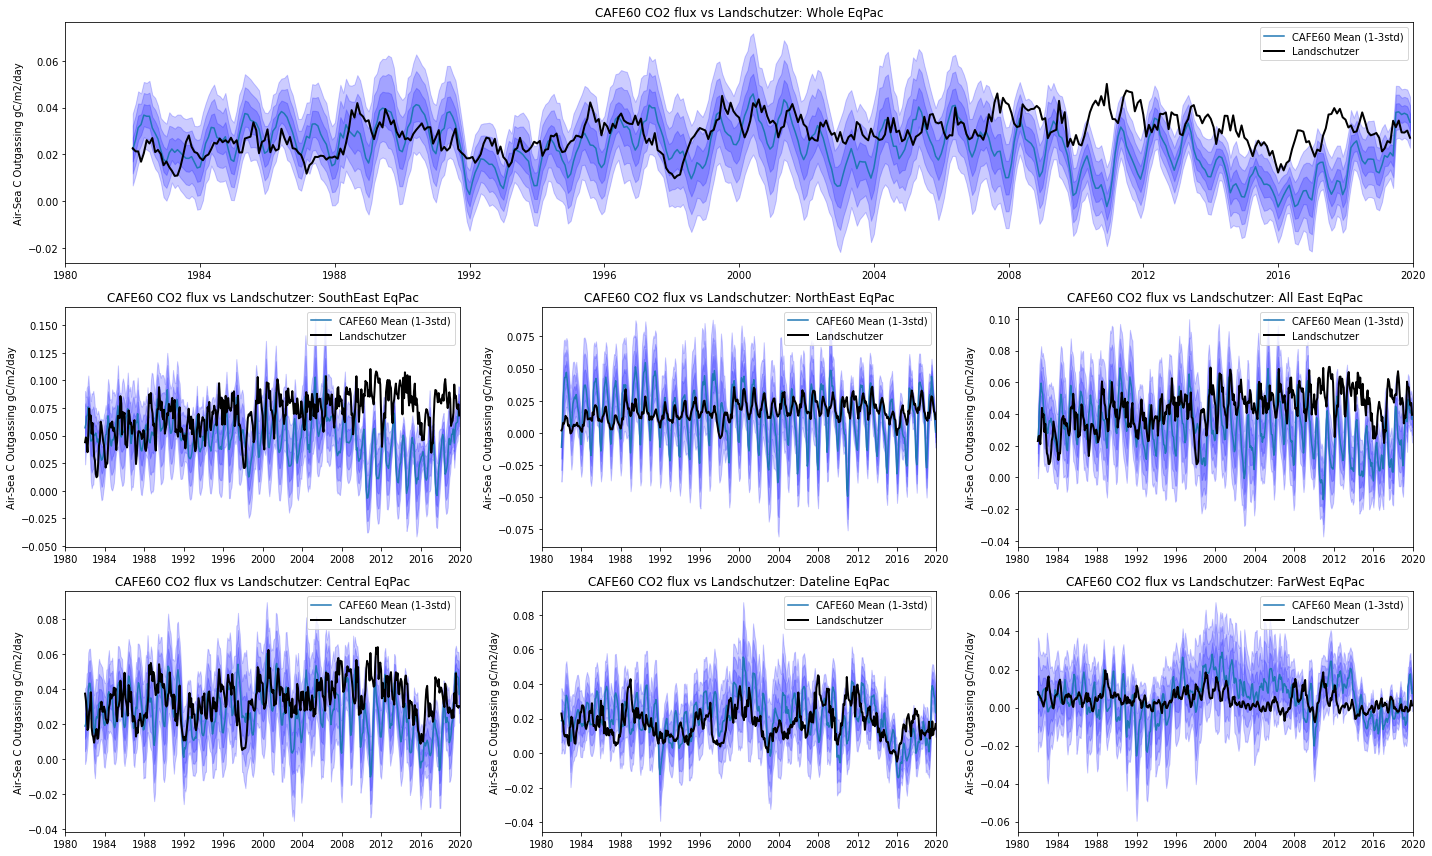

<xarray.Dataset>
Dimensions:      (ensemble: 96, region: 7)
Coordinates:
  * ensemble     (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * region       (region) int64 0 1 2 3 4 5 6
Data variables:
    percenterr   (region, ensemble) float64 9.666 6.69 -15.32 ... -354.4 -497.2
    bias         (region, ensemble) float64 0.001576 -7.235e-05 ... 0.003225
    mae          (region, ensemble) float64 0.009631 0.01025 ... 0.009204
    region_name  (region) <U15 'Whole EqPac' ... 'FarWest EqPac'


In [77]:
#Ok how does this error look through time for different parts of the Pacific.
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

all_err=[]
for i,latlon in enumerate(locs):
    #Conversion  #mmol/s to mol/s to mol/day to g/day and also invert for sea-air flux
    cafe_co2_std_reg=(cafe_co2_all).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    cafe_co2_mean_reg=(cafe_co2_all).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    
    land_co2_std_reg=((land_co2.fgco2_smoothed)).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    land_co2_mean_reg=((land_co2.fgco2_smoothed)).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    
    print('cafe Co2 flux: '+ str(cafe_co2_mean_reg.mean(dim=['time','ensemble']).stf10.values))
    print('land co2 flux: '+str(land_co2_mean_reg.mean(dim=['time']).values))
    
    err=cafe_co2_mean_reg.std(dim='ensemble')
    m=cafe_co2_mean_reg.mean(dim='ensemble')
    
    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
    ax.plot(m.time,m.stf10)
    ax.fill_between(err.time.values,m.stf10+(err*1).stf10,m.stf10-(err*1).stf10,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.stf10+(err*2).stf10,m.stf10-(err*2).stf10,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.stf10+(err*3).stf10,m.stf10-(err*3).stf10,alpha=0.2,color='blue')

    ax.plot(land_co2_mean_reg.time,land_co2_mean_reg,c='k',linewidth=2)
    ax.legend(['CAFE60 Mean (1-3std)','Landschutzer'])
    ax.set_xlim(['1980-01-01','2020-01-01'])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    #ax.set_title('CO2 flux comparisons')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])

    
    #Calculate biases
    
    #These biases might be backwards.
    perc_err=(((cafe_co2_mean_reg.stf10-land_co2_mean_reg)/land_co2_mean_reg)*100).mean(dim='time')
    bias=(cafe_co2_mean_reg.stf10-land_co2_mean_reg).mean(dim='time')
    mae=np.abs(cafe_co2_mean_reg.stf10-land_co2_mean_reg).mean(dim='time')
    print(labels[i]+' : '+str(perc_err.mean(dim='ensemble').values) + '% err')
    perc_err.name='percenterr'
    bias.name='bias'
    mae.name='mae'
    err_stats=xr.merge([perc_err,bias,mae],compat='override')
    err_stats['region']=i
    err_stats['region_name']=labels[i]
    all_err.append(err_stats)
    
regional_err=xr.concat(all_err,dim='region')

#Where do we want to save results??
#regional_err.to_netcdf('/scratch1/pit071/CO2_flux_error.nc')
plt.tight_layout()
plt.show()
print(regional_err)

## Lets look at and compare model CO2 flux to Landshutzer (seasonal)

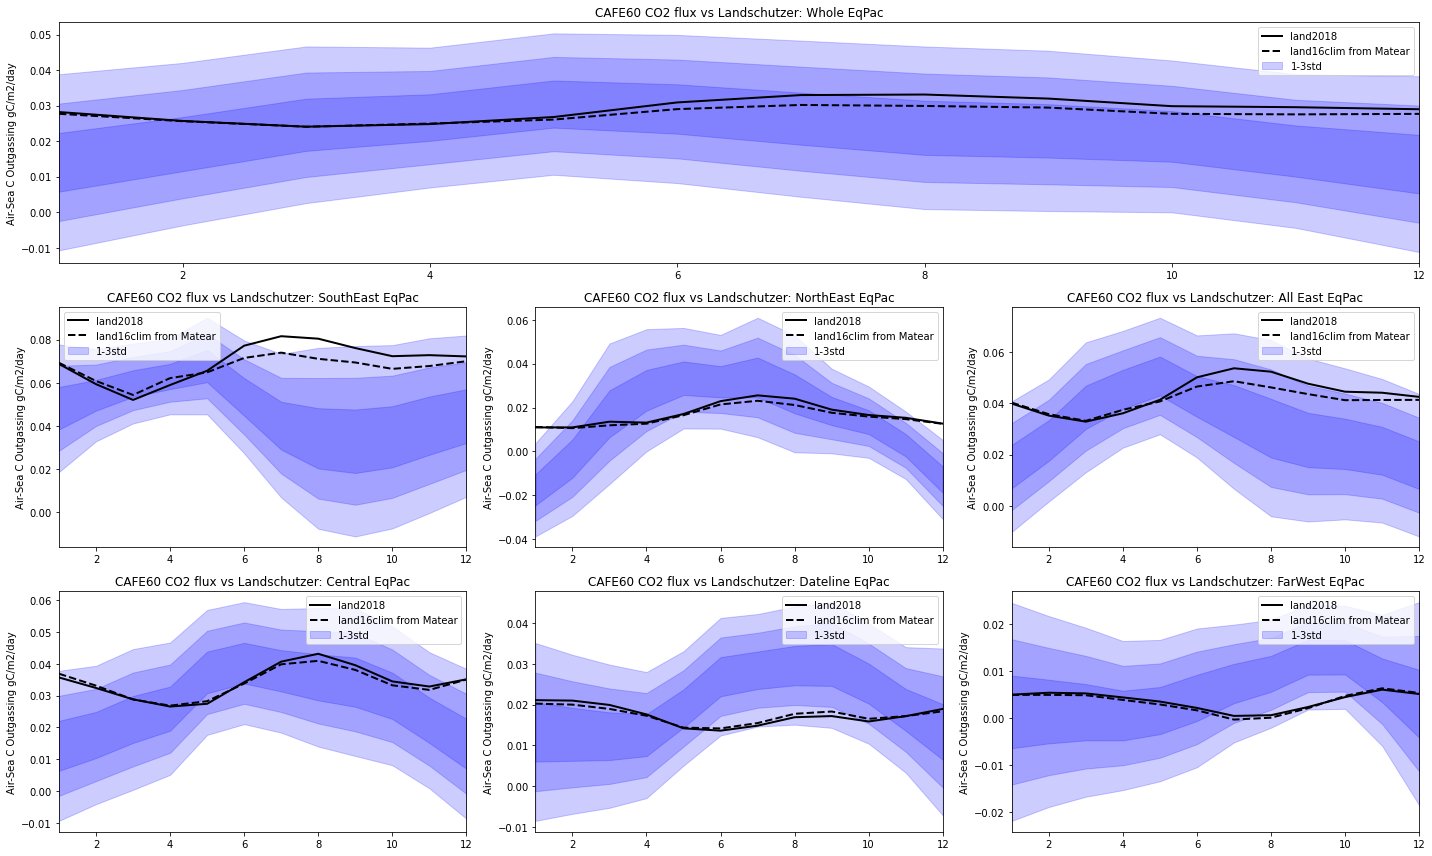

In [52]:
#They don't line up very well so lets check the seasonality
clim=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzermatear_clim_eqpac_regrid.nc').fgco2_clim/365
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    cafe_seasonality=cafe_co2_all.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).stf10.groupby('time.month').mean()
 
    land_seasonality=land_co2.fgco2_smoothed.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])

    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
        
    err=cafe_seasonality.std(dim='ensemble').mean(dim=['lat','lon'])
    m=cafe_seasonality.mean(['lat','lon','ensemble'])
    
    ax.fill_between(err.month,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*3),m-(err*3),alpha=0.2,color='blue')

    ax.plot(land_seasonality.month,land_seasonality,c='k',linewidth=2)
   
    olc=clim.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    olc['monthclim']=olc['monthclim']+1
    ax.plot(olc.monthclim,olc,c='k',linewidth=2,linestyle='--')
    
    
    #Ok we could plot the individual lines using seaborn. 
    
    #land_seasonality=land_seasonality.to_dataframe().reset_index()
    #seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
    #sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
    #sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')
        
    ax.set_xlim([1,12])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])
    ax.legend(['land2018','land16clim from Matear','1-3std']) #,
plt.tight_layout()

## Lets use those biases that we created before

In [85]:
#These should be quite close.
print(((0.0224-0.028)/0.028)*100) #Values from mean land and cafe co2 flux whole eq.
regional_err.sel(region=0).percenterr.mean().values

-20.0


array(-17.82865166)

NameError: name 'regional_err' is not defined

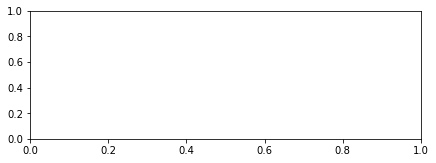

In [12]:
#Lets check the errors. 
plt.figure(figsize=(7,8))
plt.subplot(311)
regional_err.sel(region=0).percenterr.plot()
plt.title('CO2 flux Percent Error for each ensemble member')
plt.axhline(0,c='k')
plt.subplot(312)
regional_err.sel(region=0).bias.plot(c='b')
plt.axhline(0,c='k')
plt.title('CO2 flux Bias for each ensemble member')
plt.subplot(313)
regional_err.sel(region=0).mae.plot(c='r')
plt.axhline(0,c='k')
plt.title('CO2 flux MAE for each ensemble member')
plt.ylabel('co2 flux g/m2/day difference')

plt.tight_layout()

In [ ]:
#bias_ens=np.abs(bias).idxmin(dim='ensemble')
#rms_ens=rms.idxmin(dim='ensemble')

In [180]:
#Tells us the best perfming CO2 flux models are 46 for the whole pac and eastenr pacific, 64,48 and 1 in the central and west.
print(regional_err.percenterr.idxmin(dim='ensemble').values)
print(regional_err.region_name.values)

[47. 47. 47. 47. 64. 48.  1.]
['Whole EqPac' 'SouthEast EqPac' 'NorthEast EqPac' 'All East EqPac'
 'Central EqPac' 'Dateline EqPac' 'FarWest EqPac']


## Error

In [4]:
#Lets expand a bit further with calculating bias per pixel
#Calculate RMS and bias real quick... I say that but this might take a little while to process....  ()
#Might crash
# ------------------------------------------------
def calculate_co2_err():
    model=cafe_co2_all.stf10#.mean(dim=['time','ensemble'])
    obs=land_co2.fgco2_smoothed#.mean(dim='time')

    diff=model-obs
    diff_log=np.log10(model)-np.log10(obs)
    bias=10**(diff_log)
    perc_err=((model-obs)/obs)*100
    rms=np.sqrt(diff**2)
    mae=np.abs(diff)

    perc_err.name='perc_err'
    rms.name='rms'
    bias.name='bias'
    diff.name='difference'
    mae.name='mae'

    all_error=xr.merge([perc_err,rms,bias,diff,mae])
    print(all_error.nbytes/1e9)
    all_error.to_netcdf('/scratch1/pit071/CAFE60/processed/eqpac/CO2_flux_allerror.nc')
    return True
#Combine these into a dataset and save? WHere are we saving the results?! Lets make some folders.
def mean_co2_err():
    err=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/CO2_flux_allerror.nc')
    err_tmean=err.mean(dim='time')
    err_tmean.to_netcdf('/scratch1/pit071/CAFE60/processed/eqpac/CO2_flux_meanerror.nc')

In [4]:
#calculate_co2_err()
#mean_co2_err()

/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [6]:
err_tmean=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/CO2_flux_meanerror.nc')

In [7]:
# OK need to think more about how to plot all this.

KeyboardInterrupt: 

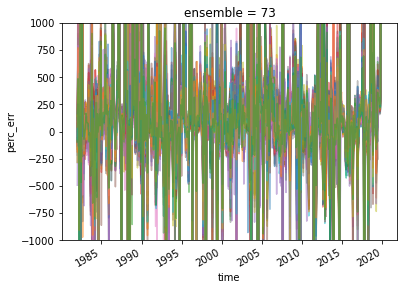

In [31]:
for i in err.ensemble:
    #print(i.values)
    model=err.sel(ensemble=i)
    model.perc_err.mean(dim=['lat','lon']).plot(alpha=0.5)
    plt.ylim([-1000,1000])

## Same again but for SST 

In [32]:
titles=[
    'CAFE SST Ensemble Mean',
    'Reynolds OISST Mean',
    'CAFE SST Ensemble Mean 1982-2020 trend',
    'Reynolds OISST 1982-2020 trend',
    'CAFE SST Ensemble Mean 1982-2020 trend',
    'Reynolds OISST 2000-2020 trend']

mean_trends_82_20(cafe_sst_mean.sst,cafe_sst_82tr.trend,cafe_sst_20tr.trend,rey_sst.sst,rey_sst_82tr.trend,rey_sst_20tr.trend,titles,[-0.15,0.15],[-0.15,0.15],[0,32],[0,32],1,1,'viridis')

NameError: name 'mean_trends_82_20' is not defined

In [37]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   1-Process_CAFE_data.ipynb
	modified:   2-Download_TPCA.ipynb
	modified:   4-Plot_and_compare.ipynb
	deleted:    CAFE60_varcutter.ipynb
	deleted:    carbon_math.py
	deleted:    funcx.py
	deleted:    model_cutting_functions.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	JRA_EQPAC_WINDSPEED.nc
	__pycache__/
	a_carbon_math.py
	a_model_cutting_functions.py
	bilinear_180x170_300x360.nc
	bilinear_180x360_300x360.nc
	bilinear_40x170_300x360.nc
	bilinear_40x170_98x170.nc
	dask-worker-space/
	old/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
! git add 1-Process_CAFE_data.ipynb
! git add 2-Download_TPCA.ipynb
! git add 4-Plot_and_compare.ipynb
! git add CAFE_CAFE60_varcutter.ipynb
! git add a_carbon_math.py a_model_cutting_functions.py
!git add carbon_math.py
! git add ufuncx